<https://www.tensorflow.org/tutorials/keras/regression>

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

In [41]:
matplotlib.rcParams['figure.figsize'] = [20, 10]

In [42]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [43]:
X, y = fetch_california_housing(return_X_y=True, as_frame=True)
X.head(4)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25


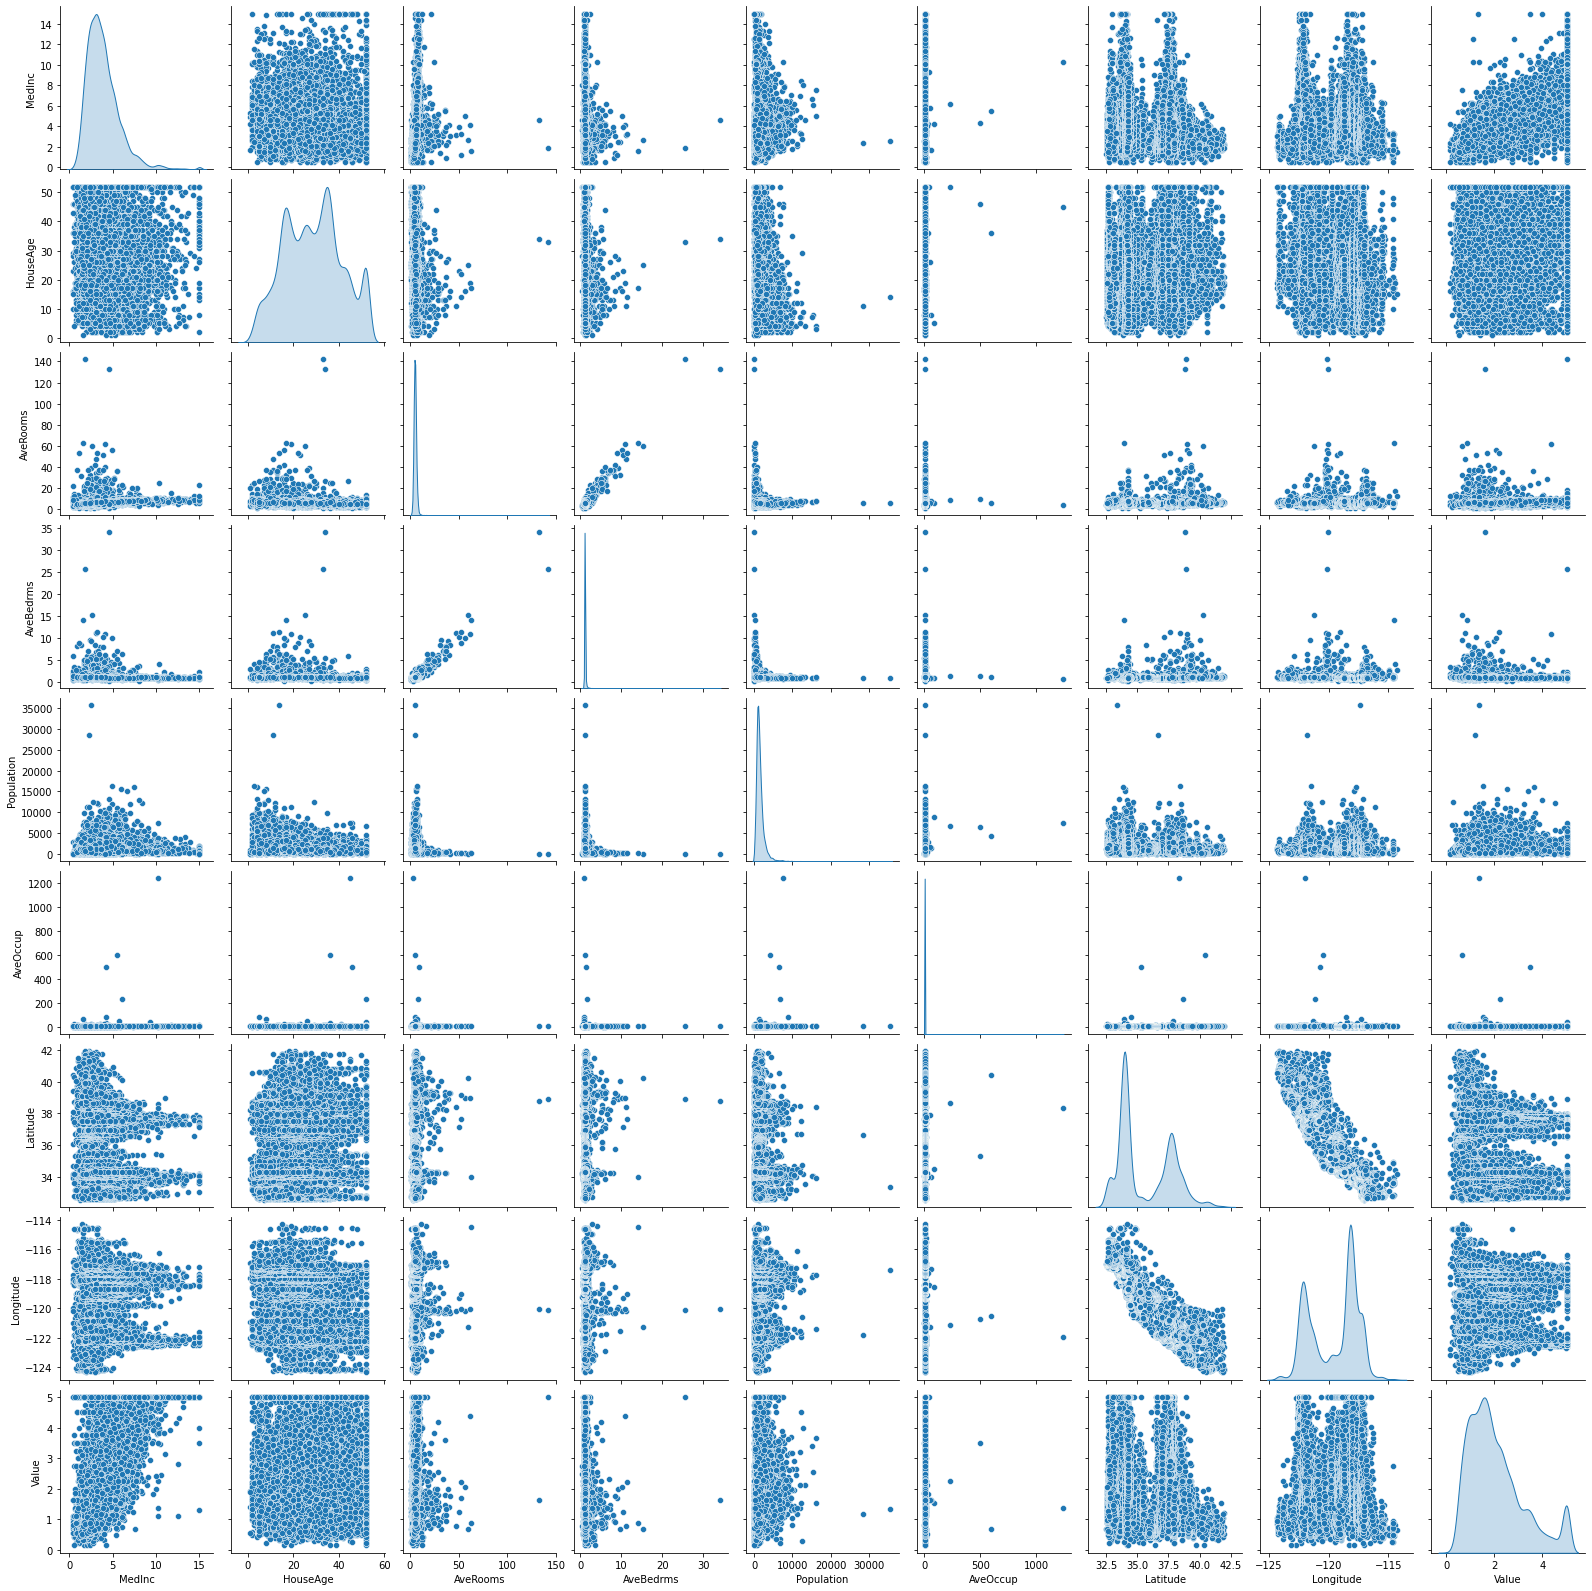

In [44]:
X_y = X.copy()
X_y['Value'] = y
sns.pairplot(X_y, diag_kind='kde')

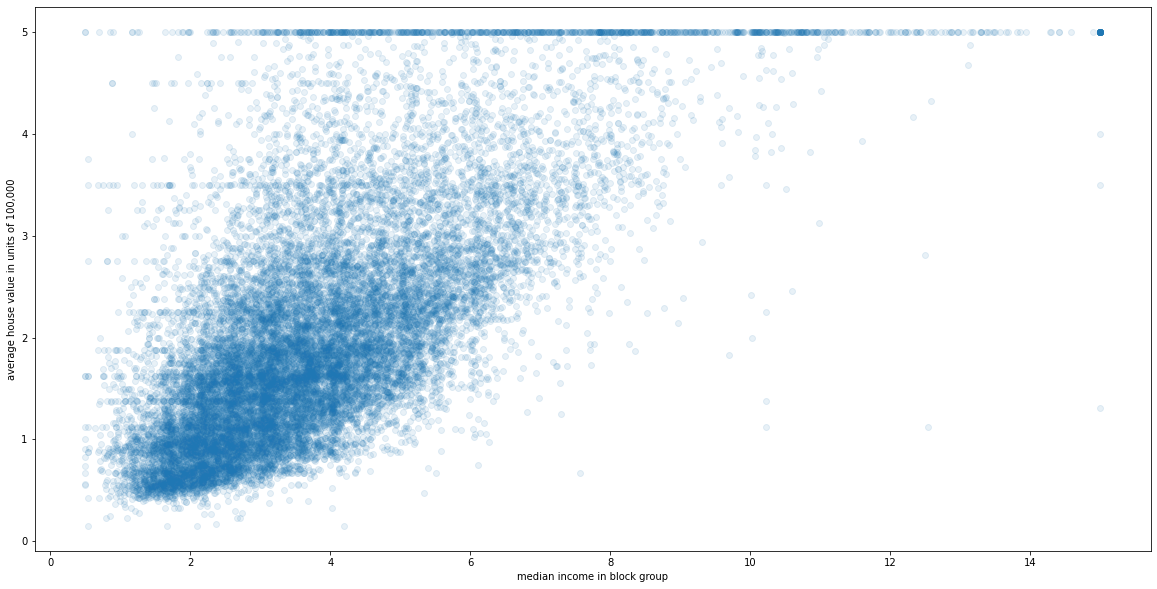

In [21]:
plt.scatter(X["MedInc"], y, alpha=0.1)
plt.xlabel("median income in block group")
plt.ylabel("average house value in units of 100,000")
plt.show()

In [23]:
X, y = fetch_california_housing(return_X_y=True, as_frame=True)
X, y = X[y < 5], y[y < 5]

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666, test_size=0.1)

In [31]:
from sklearn.linear_model import LinearRegression

skl_linear_model = LinearRegression()

# 4. Adjust parameters of the model to training dataset.
skl_linear_model.fit(X_train[["MedInc"]], y_train)

LinearRegression()

(0.4999, 15.0001)

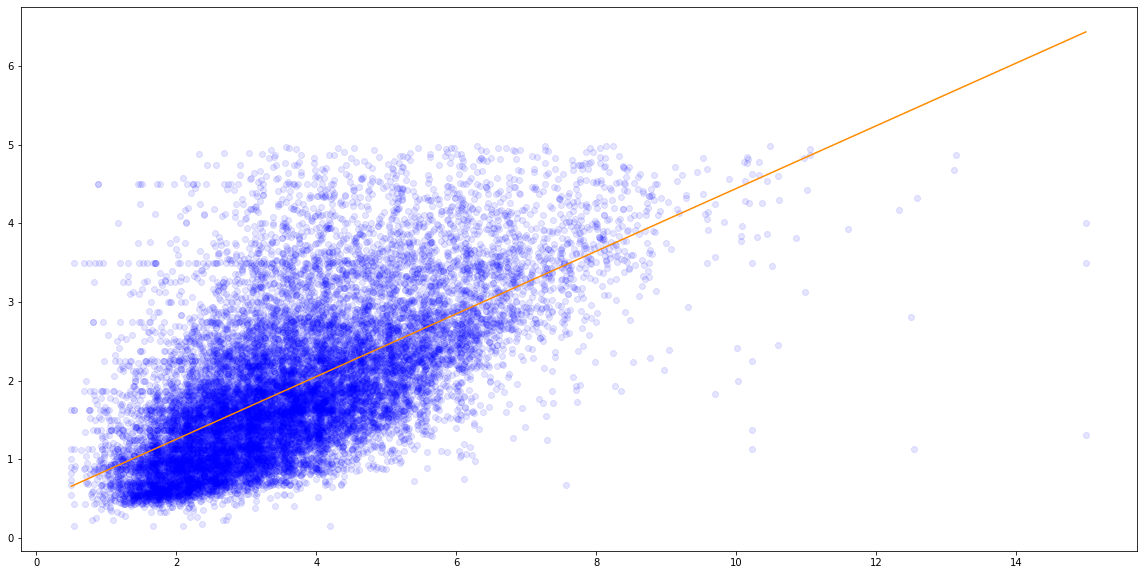

In [73]:
x = np.linspace(X_train["MedInc"].min(), X_train["MedInc"].max(), 50)
y_hat = skl_linear_model.predict(pd.DataFrame({"MedInc": x}))
plt.scatter(X_train["MedInc"], y_train, alpha=0.1, c="blue")
plt.plot(x, y_hat, c="darkorange")
plt.show()

In [34]:
## Evaluate model on test dataset.

from sklearn.metrics import mean_squared_error
y_test_hat = skl_linear_model.predict(X_test[["MedInc"]])

np.sqrt(np.sqrt(mean_squared_error(y_test, y_test_hat)))

0.8506821895432966

## TF version

In [47]:
from tensorflow import keras

In [50]:
med_inc_normalizer = keras.layers.Normalization(input_shape=[1,], axis=None)
med_inc_normalizer.adapt(X_train["MedInc"])

In [51]:
med_inc_model = keras.Sequential([
    med_inc_normalizer,
    keras.layers.Dense(units=1)
])

med_inc_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 1)                3         
 ion)                                                            
                                                                 
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________


In [53]:
med_inc_model.predict(X_train["MedInc"])

553/553 [==============================] - 0s 522us/step


array([[ 0.5962253],
       [ 0.5707981],
       [-0.719652 ],
       ...,
       [ 0.5081168],
       [-1.2114798],
       [-0.5040842]], dtype=float32)

In [54]:
med_inc_model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [55]:
%%time
history = med_inc_model.fit(
    X_train["MedInc"],
    y_train,
    epochs=100,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

CPU times: user 34.4 s, sys: 3.7 s, total: 38.1 s
Wall time: 30.1 s


In [58]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
95,0.560513,0.567996,95
96,0.559999,0.561456,96
97,0.559693,0.570342,97
98,0.563664,0.572477,98
99,0.560529,0.584854,99


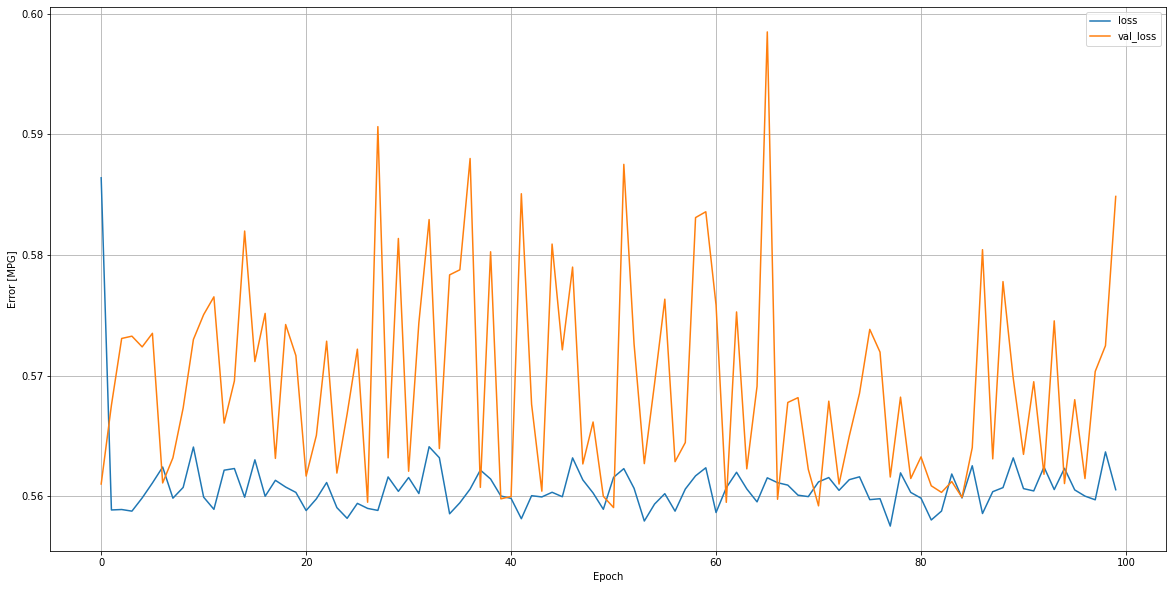

In [61]:

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')

plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.legend()
plt.grid(True)

2/2 [==============================] - 0s 2ms/step


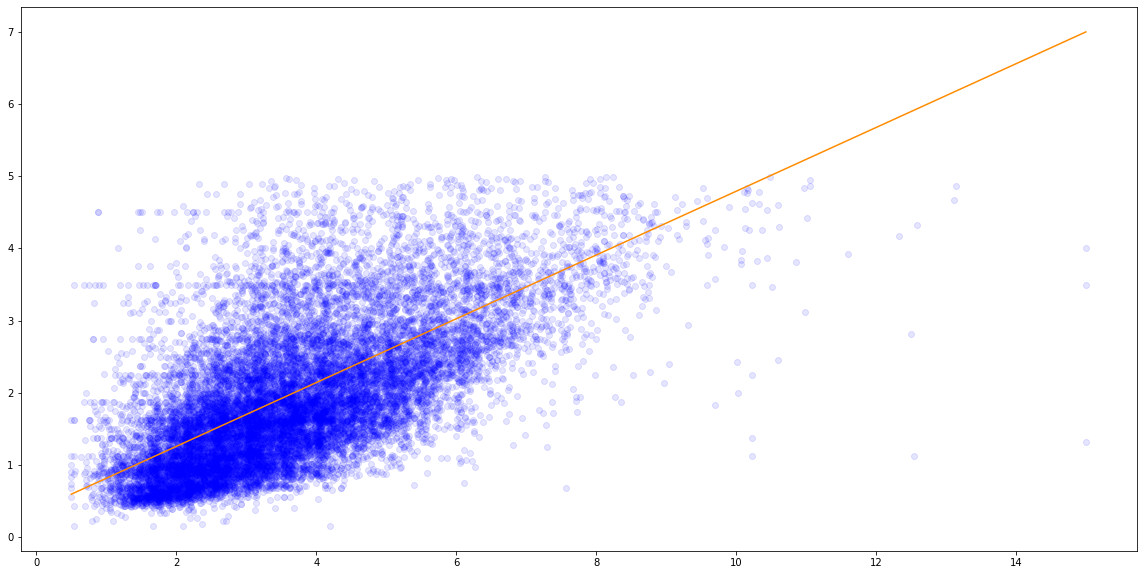

In [74]:
x = np.linspace(X_train["MedInc"].min(), X_train["MedInc"].max(), 50)
y_hat = med_inc_model.predict(x)
plt.scatter(X_train["MedInc"], y_train, alpha=0.1, c="blue")
plt.plot(x, y_hat, c="darkorange")
plt.show()